In [1]:
import cv2
import numpy as np
import imutils
import os
import shutil
from matplotlib import pyplot as plt
from IPython.display import Image 
from PIL import Image        
from types import SimpleNamespace
import random as rng
rng.seed(12345)
# to load images

In [2]:
file_ready_for_lines_detection = os.path.join(os.path.dirname(os.path.realpath("__file__")),"phase0-output/processed/88d1c53a-4933-55ab-9223-3d14f4d87a07-e6722290_pg-0_sg-0_M.jpg")
# input_file = os.path.join(os.path.dirname(os.path.realpath("__file__")),"phase0-output/processed/b2432346-2637-5e69-a752-128f71c1bb44-1d8625b3_pg-0_sg-0.jpg")
input_file = os.path.join(os.path.dirname(os.path.realpath("__file__")),"phase0-output/processed/88d1c53a-4933-55ab-9223-3d14f4d87a07-e6722290_pg-0_sg-0.jpg")

In [3]:
# img = cv2.imread(file_ready_for_lines_detection)
img = cv2.imread(input_file)
orig_img = cv2.imread(input_file)
line_only_img = cv2.imread(file_ready_for_lines_detection)

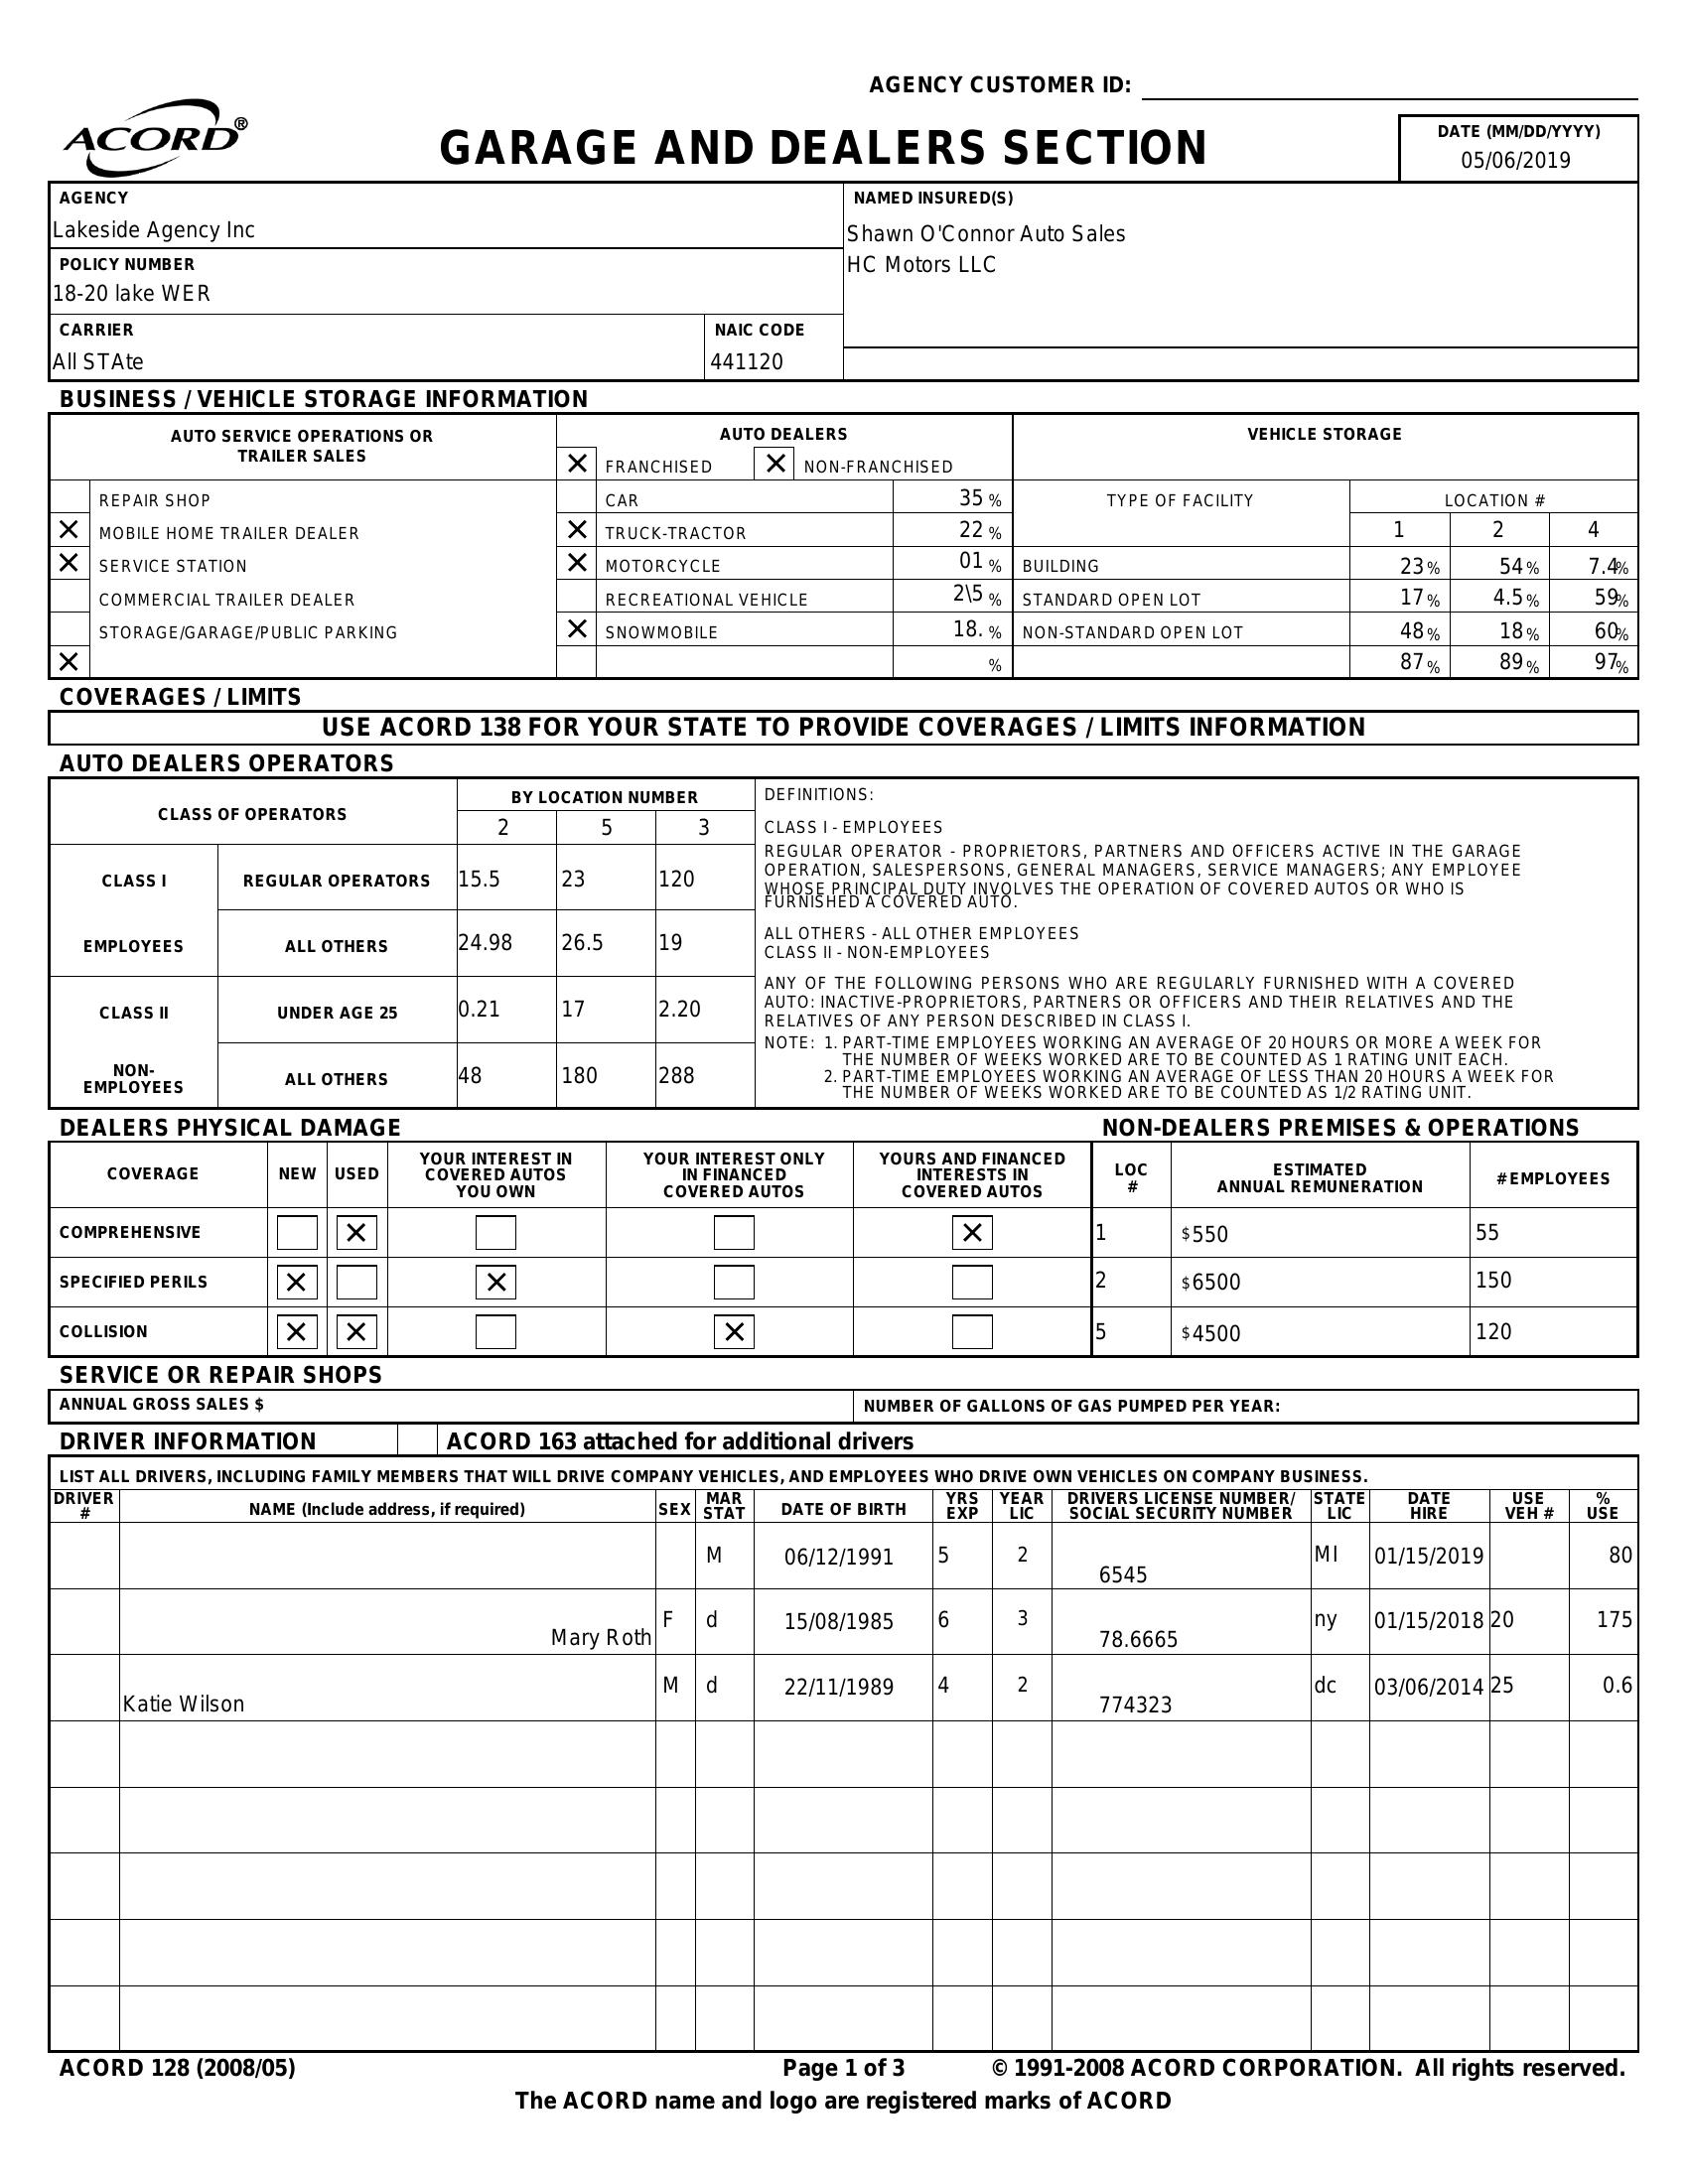

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(gray))

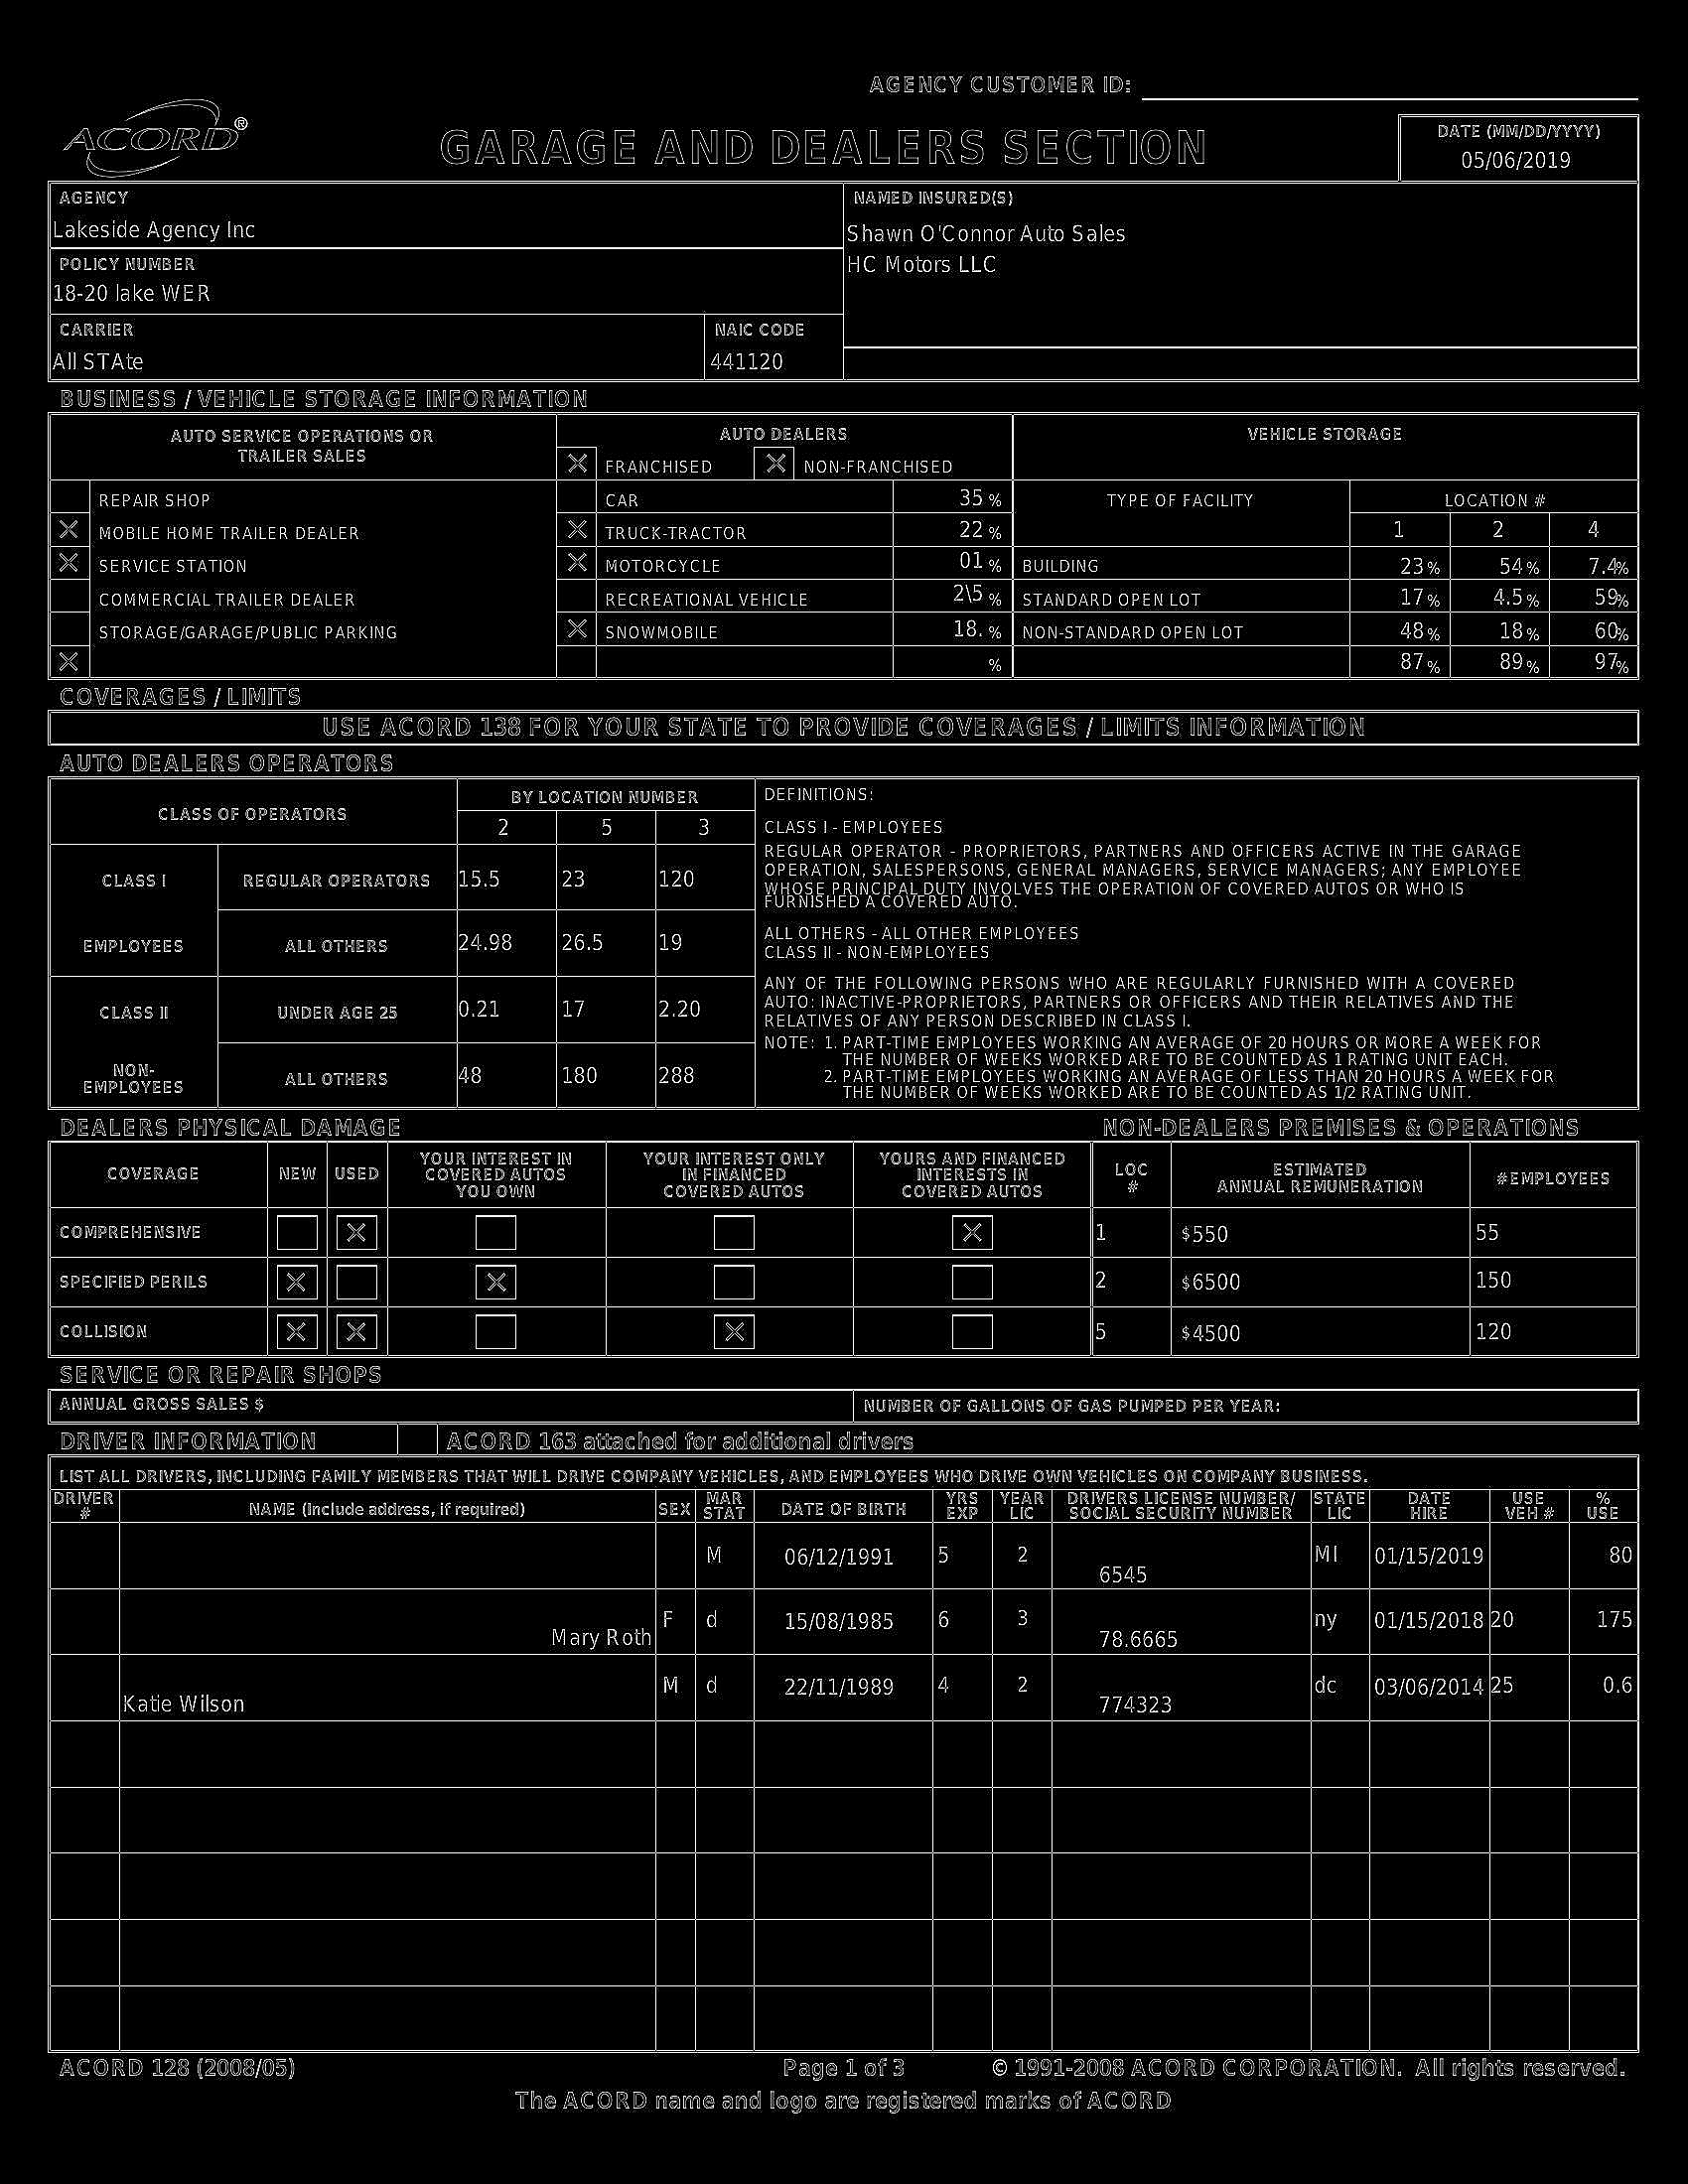

In [6]:
laplacian = cv2.Laplacian(img,cv2.CV_8U)
display(Image.fromarray(laplacian))

In [8]:

(thresh, img_bin) = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
img_bin = 255-img_bin 

verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
# A kernel of (3 X 3) ones.
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# print(hori_kernel)
# print(verticle_kernel)
# print(kernel)

#
# Morphological operation to detect vertical lines from an image
# img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=5)
# img_temp1 = cv2.filter2D(gray,-1, verticle_kernel)
verticle_lines_img = cv2.dilate(img_bin, verticle_kernel, iterations=1)
# cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# # Morphological operation to detect horizontal lines from an image
# img_temp2 =  cv2.filter2D(gray,-1, hori_kernel)
horizontal_lines_img = cv2.dilate(img_bin, hori_kernel, iterations=1)

# verticle_lines_img = cv2.dilate(img_bin,verticle_kernel, iterations = 1)
# verticle_lines_img = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, verticle_kernel)
# verticle_lines_img = cv2.morphologyEx(verticle_lines_img, cv2.MORPH_CLOSE, verticle_kernel)

# horizontal_lines_img = cv2.dilate(img_bin,hori_kernel, iterations = 2)
# horizontal_lines_img = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, hori_kernel)
# horizontal_lines_img = cv2.morphologyEx(horizontal_lines_img, cv2.MORPH_CLOSE, hori_kernel)



# #cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

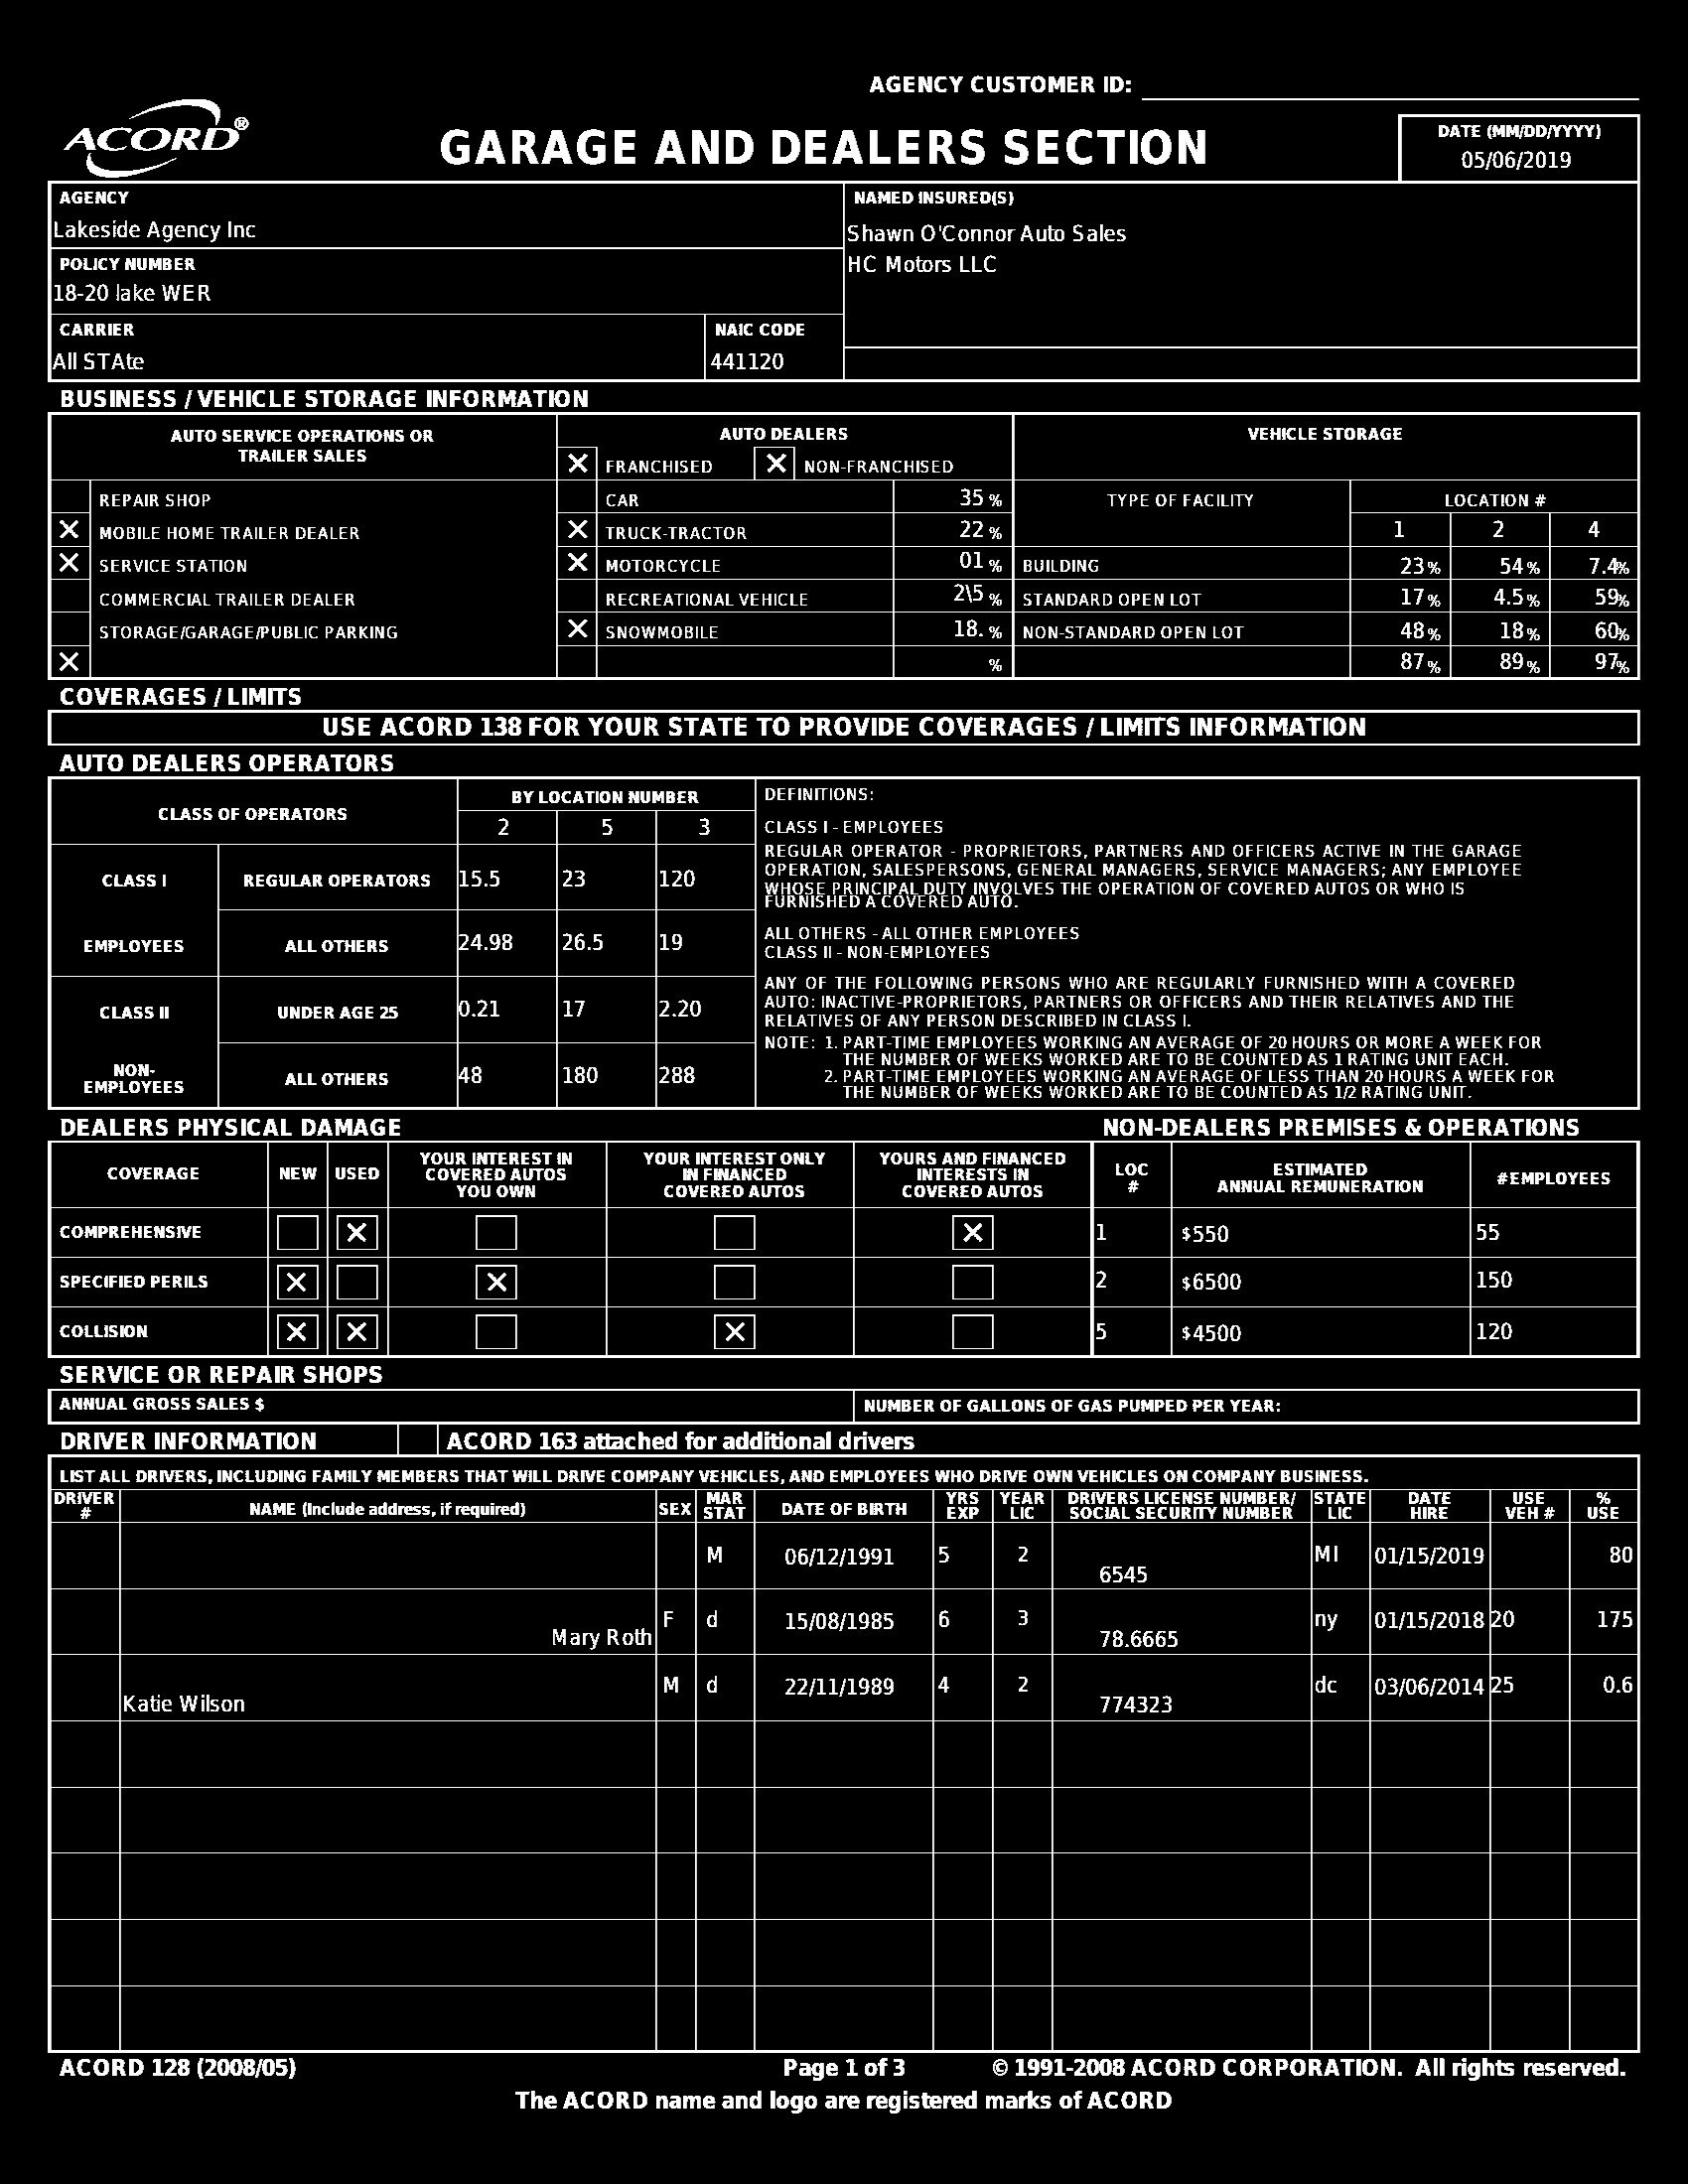

In [9]:
#
#
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.2
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
# img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=1)
display(Image.fromarray(img_final_bin))


In [11]:
(ret, thresh) = cv2.threshold(gray, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
 # Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

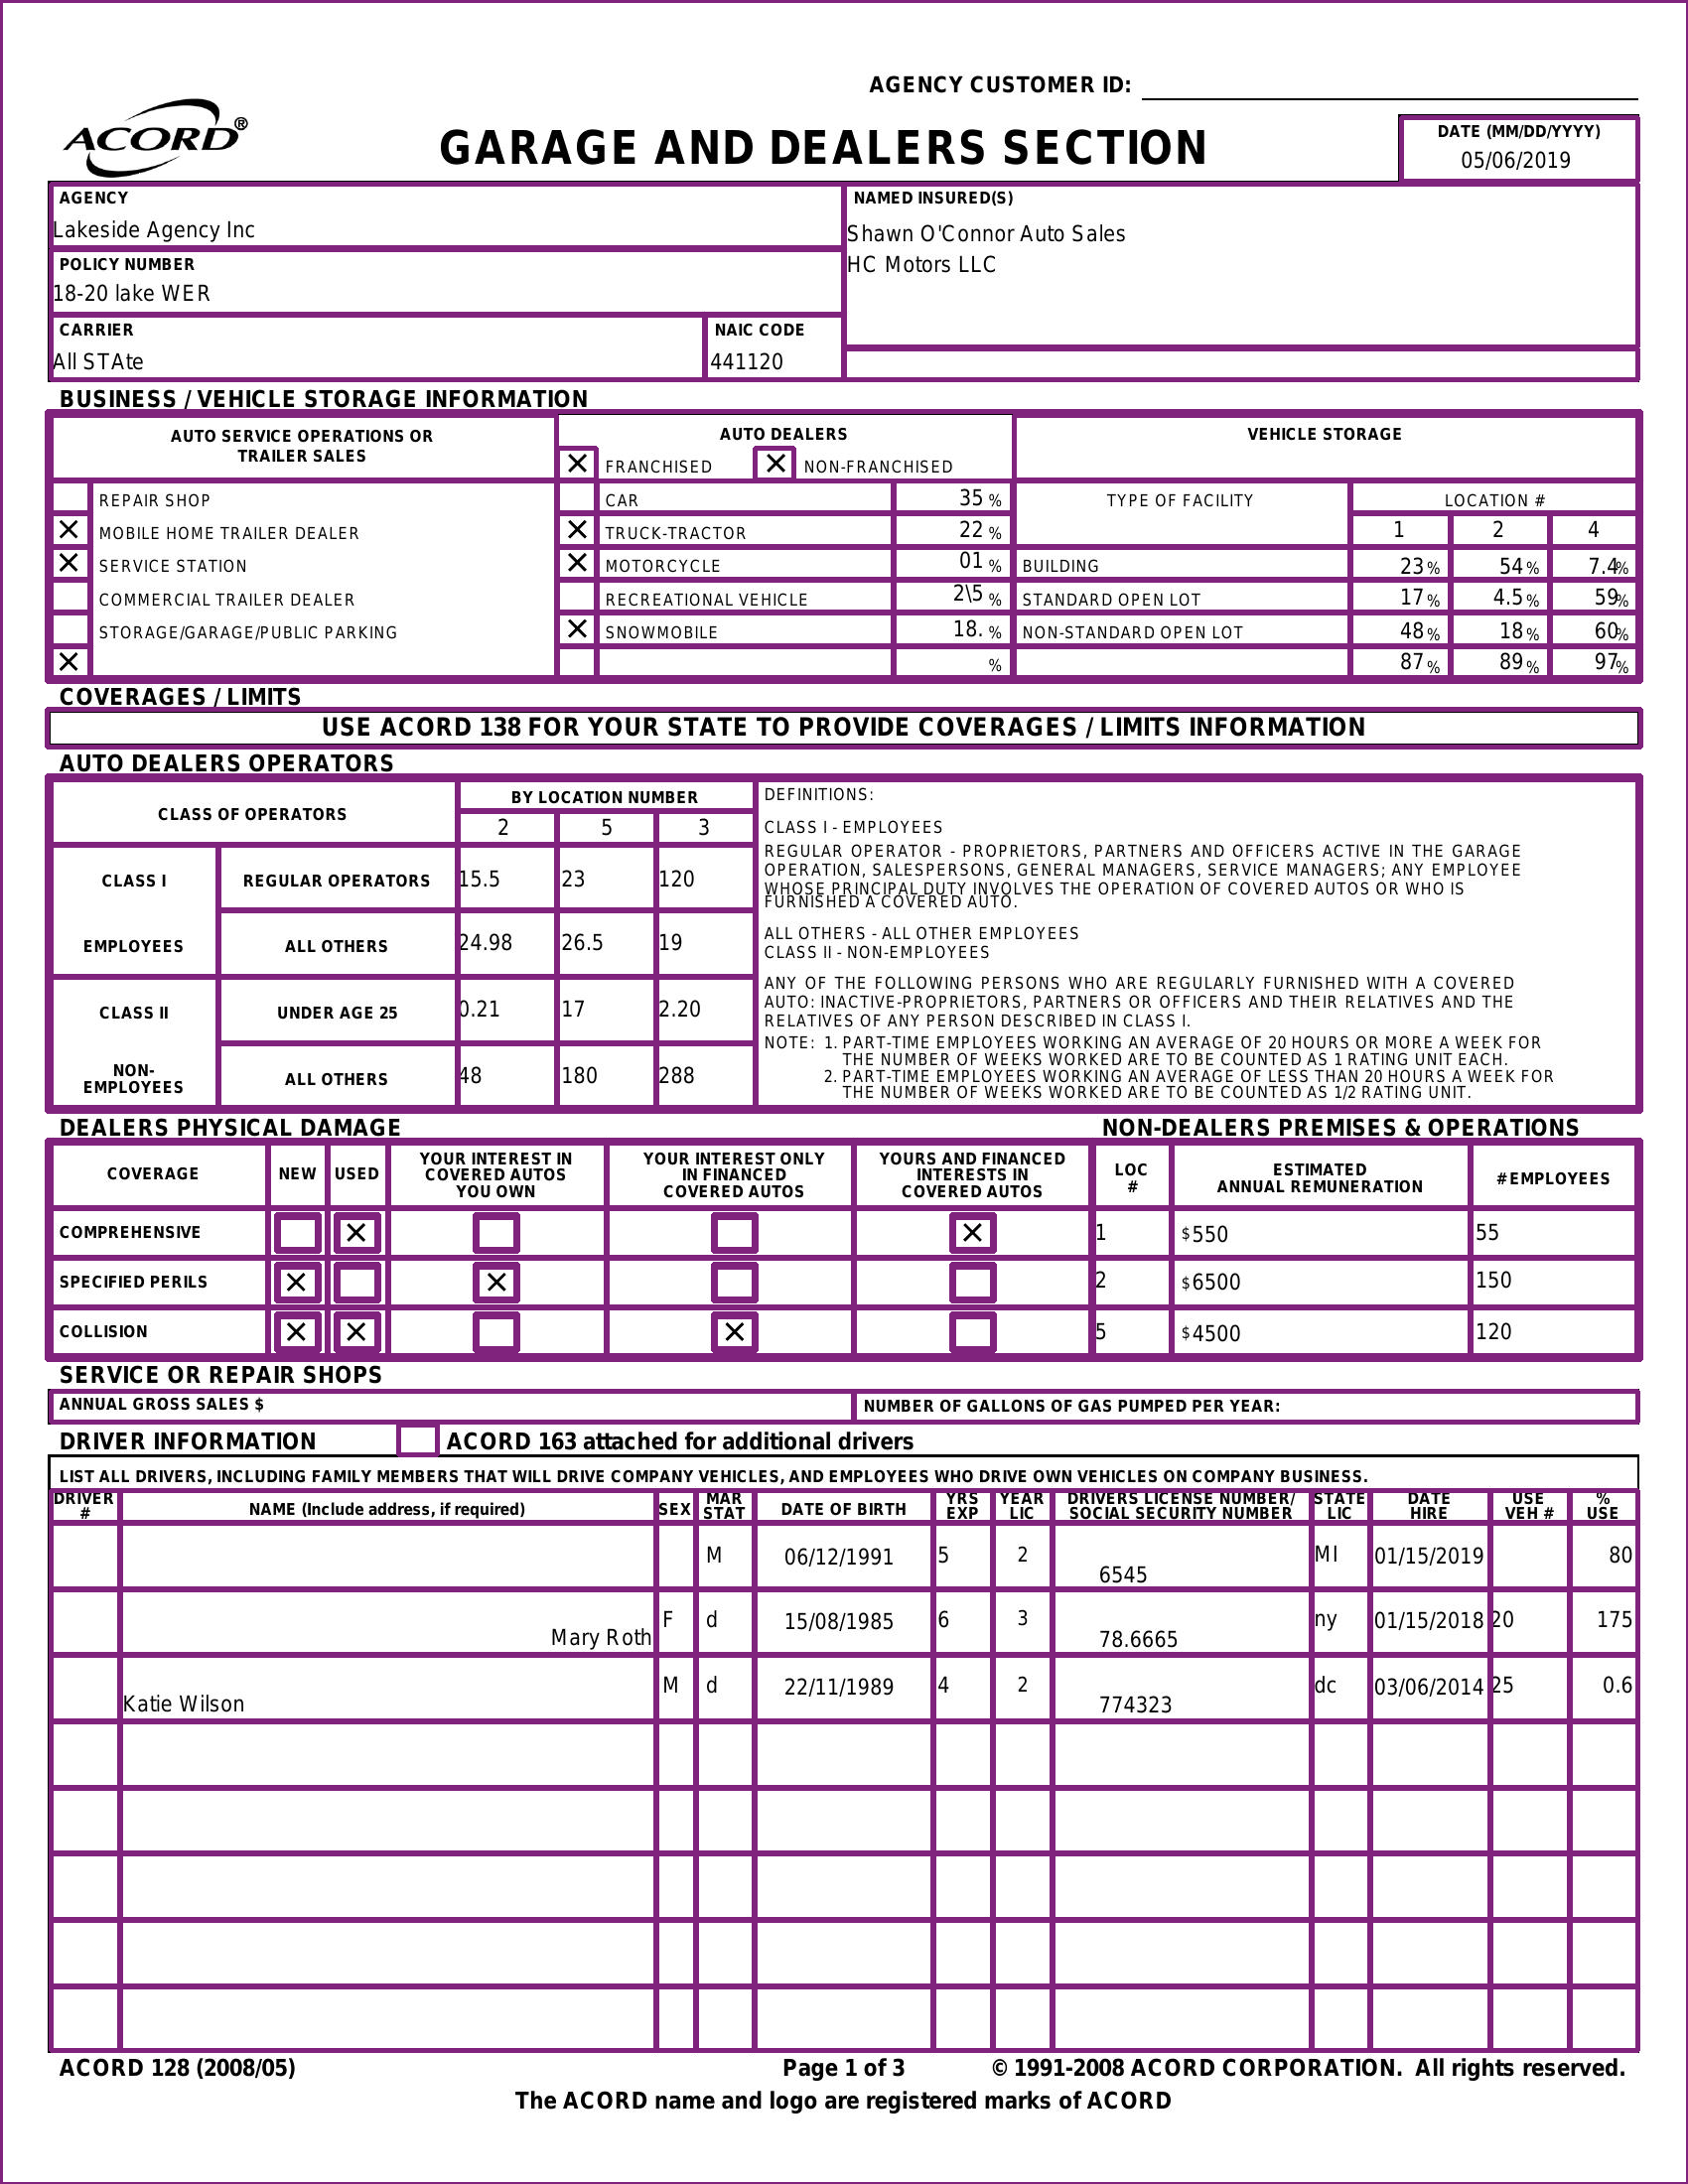

In [12]:
id= -1
overlay_img = cv2.imread(input_file)
boundRect = [None]*len(contours)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)    
    if len(approx)==4 and cv2.contourArea(cnt) > 100:
#         print(cv2.contourArea(cnt))
        color = (128,35, 125)
        id+=1
#       cv2.drawContours(img,[cnt],0,((id*id)%255,(id*10)%255,255),-1)
        boundRect[id] = cv2.boundingRect(approx)
        cv2.rectangle(overlay_img, (int(boundRect[id][0]), int(boundRect[id][1])), \
          (int(boundRect[id][0]+boundRect[id][2]), int(boundRect[id][1]+boundRect[id][3])), color, 3) 
        
#         x, y, w, h = cv2.boundingRect(cnt) 
#         r = {'x':x,'y':y,'w':w,'h':h}        
#         bounding_rects.append(SimpleNamespace(**r))
 
display(Image.fromarray(overlay_img))
# img = line_only_img